In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
numerical_columns = df.drop("quality", axis = 1)

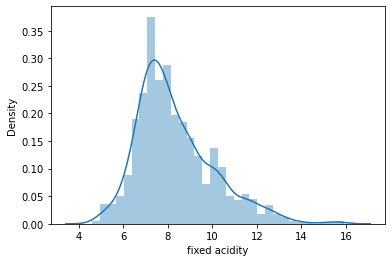

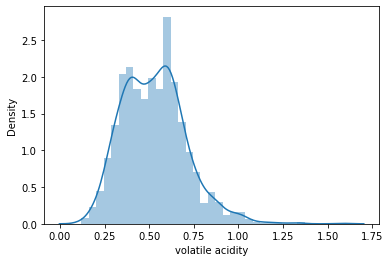

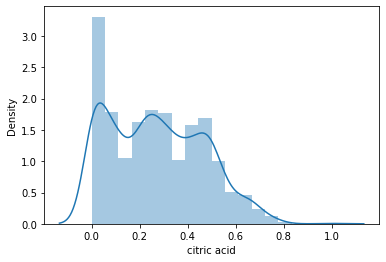

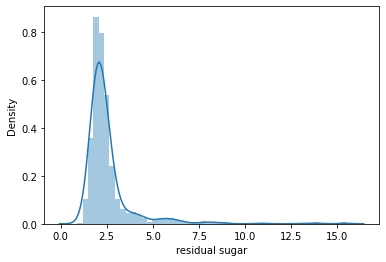

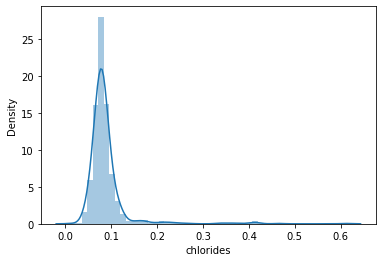

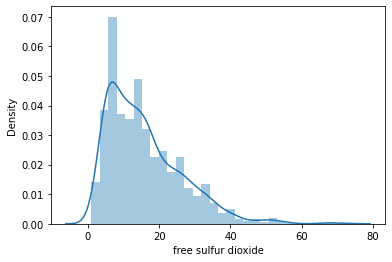

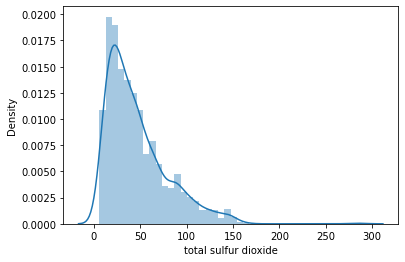

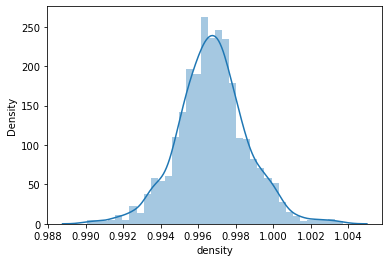

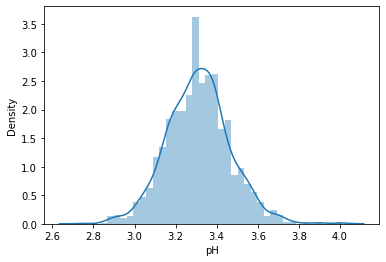

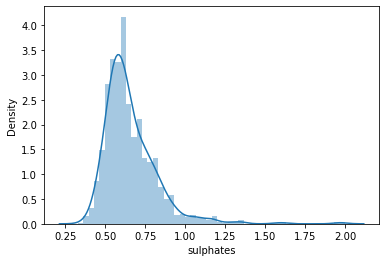

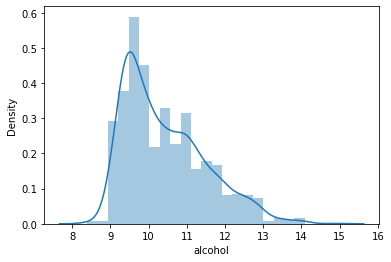

In [10]:
# looking for skewness in independent column

for col in numerical_columns:
    plt.figure()
    sns.distplot(df[col])
    plt.show()

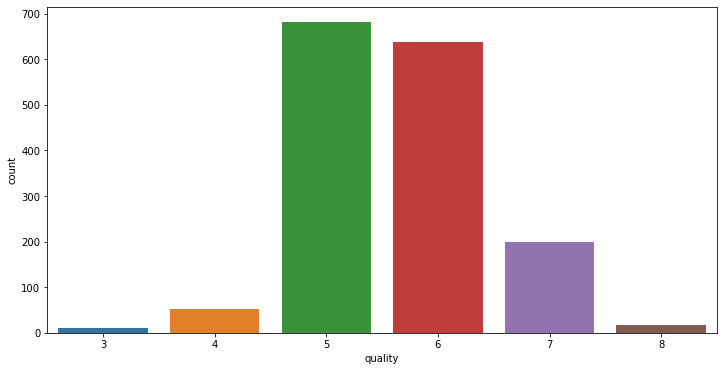

In [11]:
# looking for unique values and no of values in target column

plt.figure(figsize = (12,6))
sns.countplot(df["quality"])
plt.show()

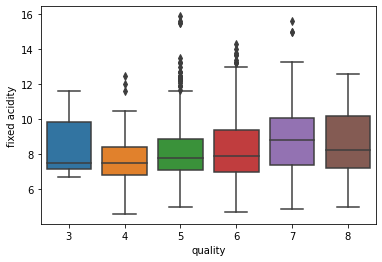

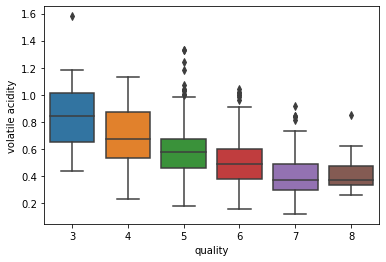

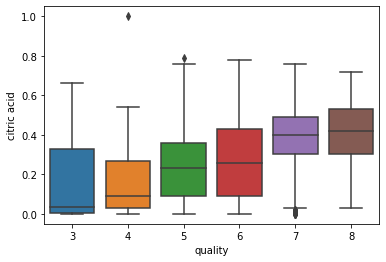

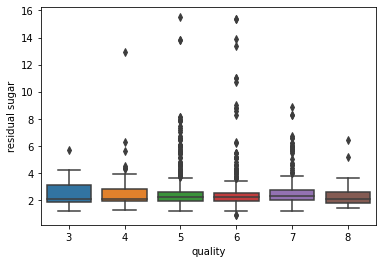

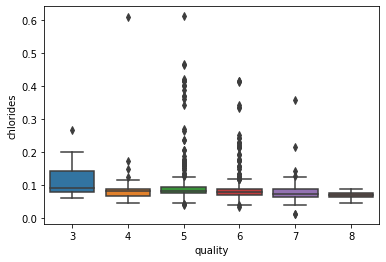

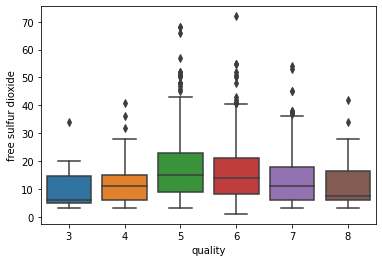

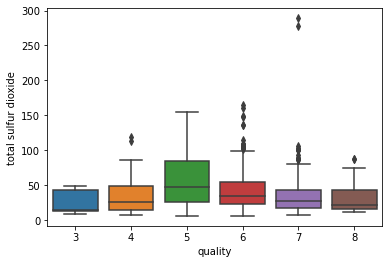

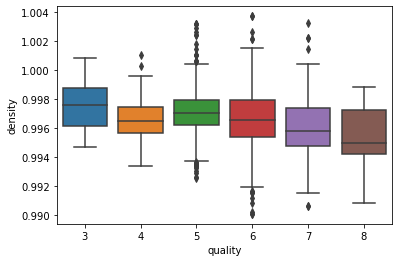

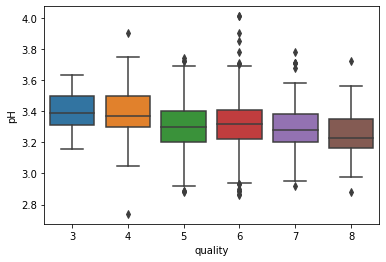

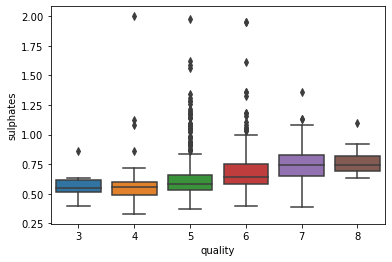

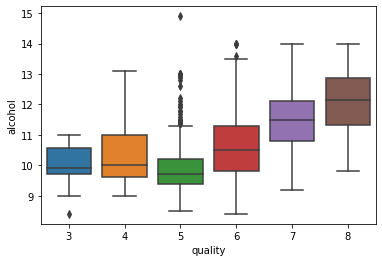

In [12]:
# looking for relation in numerical and target column and also outliers of numerical data

for col in numerical_columns:
    plt.figure()
    sns.boxplot(data=df, y=col, x="quality")
    plt.show()

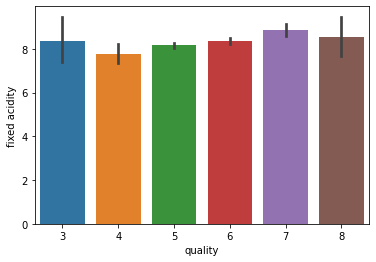

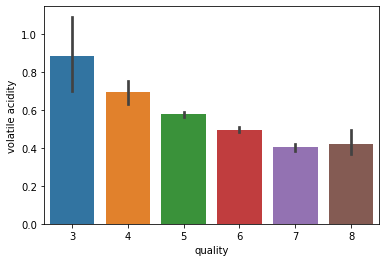

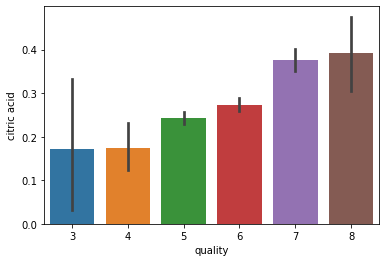

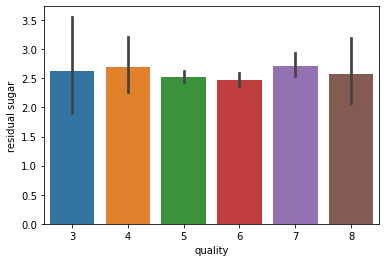

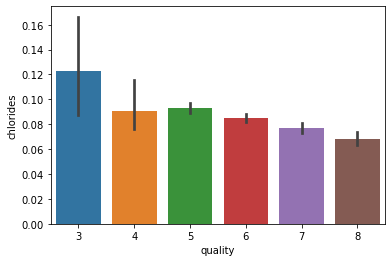

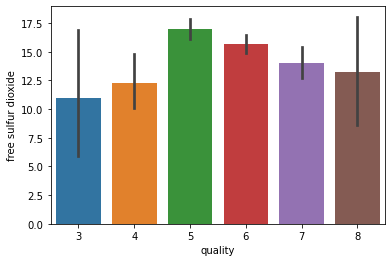

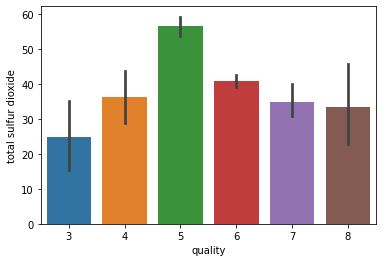

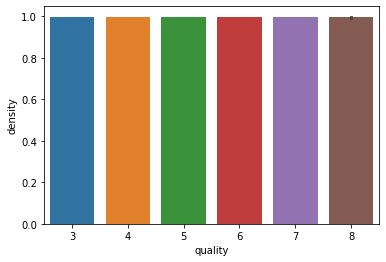

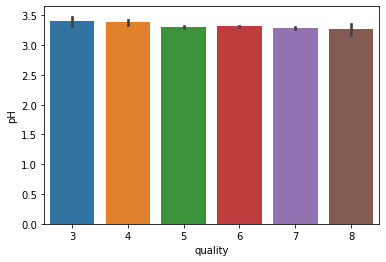

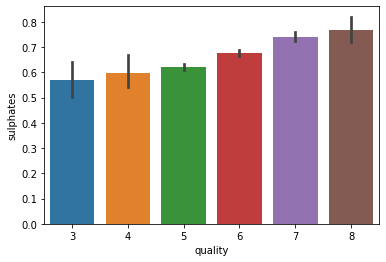

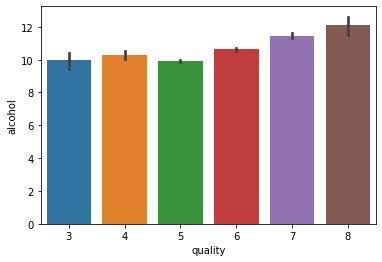

In [13]:
# plotting barplot for independent column vs target
numerical_columns = df.drop("quality", axis = 1)

for col in numerical_columns:
    plt.figure()
    sns.barplot(data=df, y=col, x="quality")
    plt.show()

## as we seen in countplot we have following observation
#### As the volatile acidity decreses the quality of wine gets better.
#### As the citric acid increses the quality of wine gets better.
#### As the chlorides decreses the quality of wine gets better.
#### As the sulphates increses the quality of wine gets better.
#### As the alcohol increses the quality of wine gets better.

In [14]:
# dividing independent feature in x and target in y

X = df.drop("quality", axis = 1)
y = df["quality"]

In [15]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [16]:
for col in X:
    ss = StandardScaler()
    X_train[col] = ss.fit_transform(X_train[[col]])
    X_test[col] = ss.transform(X_test[[col]])

In [17]:
# model

model = LogisticRegression(random_state=1, multi_class="ovr")
model.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', random_state=1)

In [18]:
y_pred = model.predict(X_test)

In [22]:
model.score(X_train, y_train)


0.6112600536193029

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.63      0.79      0.70       207
           6       0.56      0.56      0.56       195
           7       0.48      0.23      0.31        52
           8       0.00      0.00      0.00         3

    accuracy                           0.59       480
   macro avg       0.28      0.26      0.26       480
weighted avg       0.55      0.59      0.56       480

